In [ ]:
import webbrowser

webbrowser.open('https://webbtelescope.org/resource-gallery/images')

webbrowser.open('https://github.com/spacetelescope/jdat_notebooks/blob/main/notebooks/NIRCam_photometry/NIRCam_multiband_photometry.ipynb')

webbrowser.open('https://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html')

webbrowser.open('https://learn.astropy.org/tutorials/FITS-images.html')

webbrowser.open('https://jwst-docs.stsci.edu/jwst-post-pipeline-data-analysis')

webbrowser.open('https://github.com/spacetelescope/jdat_notebooks/tree/main/notebooks')

webbrowser.open('https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html')

webbrowser.open('https://www.astroexploring.com/blog/how-to-download-raw-data-from-the-james-webb-space-telescope-in-windows?format=amp&fbclid=IwAR34Y9IJW7HqB9bXP4_Q7YlsMCJnEBBCW_2I9JJ8nMhk_W6K0X7aDCoubBQ&fs=e&s=cl')

### Basic JWST image processing



<img width="600" src="JWST_filters.jpg">

supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r',  'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [2]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from matplotlib.colors import LogNorm

In [44]:
def ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end):
    
    plt.style.use(astropy_mpl_style)

    image_file = get_pkg_data_filename(image) 

    image_data = fits.getdata(image_file, ext=1)

    print("image_data: " + str(image_data.shape))

    colors = ['BrBG', 'BrBG_r', 'CMRmap', 'RdBu_r', 'flag', 'gist_rainbow', 'jet', 'jet_r', 'turbo', 'twilight', 'twilight_r', 'twilight_shifted','gray', 'gray_r'] 

    supported = colors[color_start:color_end]  # 12 colors

    for i in range(len(supported)):
        color = supported[i]

        #plt.figure(figsize=[10,8])
        plt.figure(figsize=[19.20,10.80])
        plt.imshow(image_data, cmap=color, norm=LogNorm()) # origin='lower'
        #plt.imshow(image_data, cmap=color, norm=LogNorm(), origin='lower')
        #plt.imshow(image_data[::-1], cmap=color, norm=LogNorm(), origin='lower') 
        plt.title("Color: [" + str(color) + "] " + str(image_text) + "\nLogNorm  Shape: " + str(image_data.shape), fontsize=13)
        plt.grid()
        plt.gca().invert_xaxis()
        if savefig == "Y":
            plt.savefig('/Volumes/HD_2021/JWST/My Images/' + str(image_text) + " Color: [" + str(color) + "] " + ' dpi_' + str(dpi) + '.png', dpi=dpi, facecolor='white', edgecolor='none')
        plt.show()


    print("\nDone!")

0:1 'BrBG', 
1:2 'BrBG_r', 
2:3 'CMRmap', 
3:4 'RdBu_r', 
4:5 'flag', 
5:6 'gist_rainbow', 
6:7 'jet', 
7:8 'jet_r', 
8:9 'turbo', 
9:10 'twilight', 
10:11 'twilight_r', 
11:12 'twilight_shifted'
12:13 'grey'
13:14 'gray_r'

In [38]:
color_start = 0  # 14 colors
color_end   = 12

suffix = "i2d"    # full image

#suffix = "segm"  # segment

#dpi = 100
dpi = 300
#dpi = 600
#dpi = 1200

savefig = "N"

### Stephans Quintet NGC 7320   

image_data: (12481, 14586)


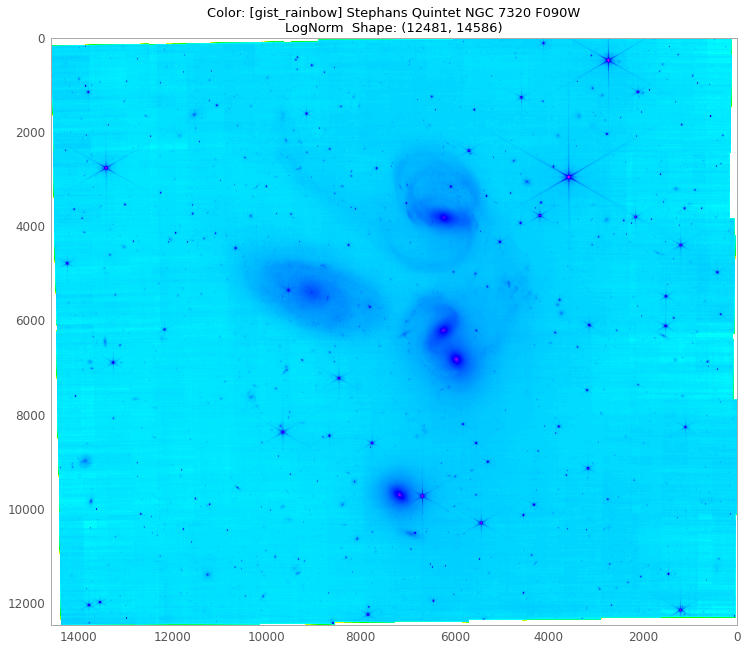


Done!


In [45]:
color_start = 5  # 14 colors
color_end   = 6
savefig = "N"

image = '/Volumes/HD_2021/JWST/NGC 7320 Stephans Quintet F090W/JWST/jw02732-o001_t001_nircam_clear-f090w/jw02732-o001_t001_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "Stephans Quintet NGC 7320 F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

# Reset to defaults
color_start = 0  # 14 colors
color_end   = 12
savefig = "N"

image_data: (12375, 14426)


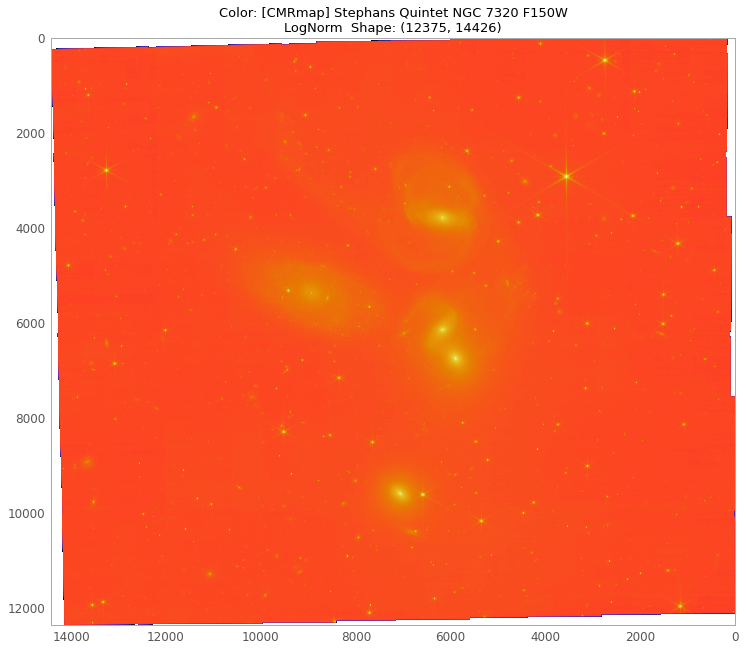


Done!


In [46]:
color_start = 2  # 14 colors
color_end   = 3
savefig = "N"

image = '/Volumes/HD_2021/JWST/NGC 7320 Stephans Quintet F150W/JWST/jw02732-o001_t001_nircam_clear-f150w/jw02732-o001_t001_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "Stephans Quintet NGC 7320 F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

# Reset to defaults
color_start = 0  # 14 colors
color_end   = 12
savefig = "N"


image_data: (12487, 14593)


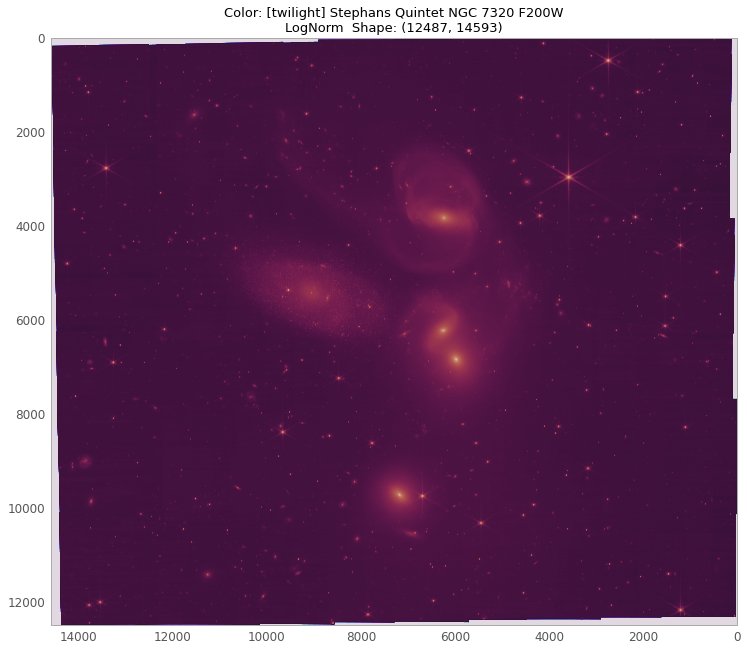


Done!


In [47]:
color_start = 9  # 14 colors
color_end   = 10
savefig = "N"

image = '/Volumes/HD_2021/JWST/NGC 7320 Stephans Quintet F200W/JWST/jw02732-o001_t001_nircam_clear-f200w/jw02732-o001_t001_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "Stephans Quintet NGC 7320 F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

# Reset to defaults
color_start = 0  # 14 colors
color_end   = 12
savefig = "N"

image_data: (6057, 7091)


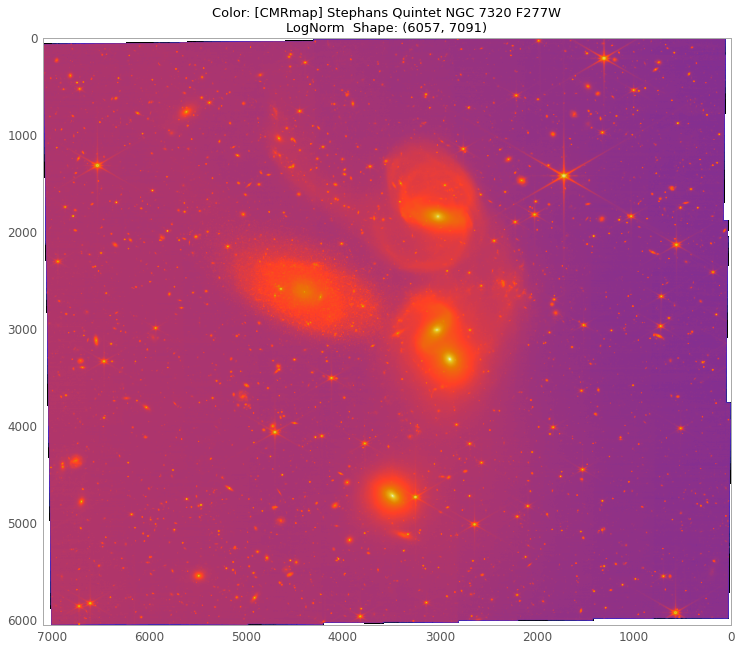


Done!


In [48]:
color_start = 2  # 14 colors
color_end   = 3
savefig = "N"

image = '/Volumes/HD_2021/JWST/NGC 7320 Stephans Quintet F277W/JWST/jw02732-o001_t001_nircam_clear-f277w/jw02732-o001_t001_nircam_clear-f277w_' + str(suffix) + '.fits'
image_text = "Stephans Quintet NGC 7320 F277W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

# Reset to defaults
color_start = 0  # 14 colors
color_end   = 12
savefig = "N"

image_data: (6057, 7092)


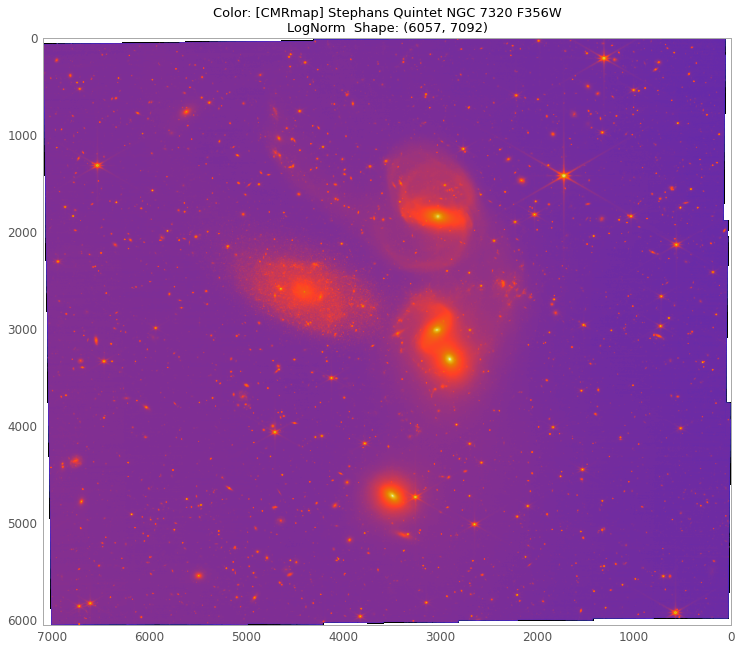


Done!


In [49]:
color_start = 2  # 14 colors
color_end   = 3
savefig = "N"

image = '/Volumes/HD_2021/JWST/NGC 7320 Stephans Quintet F356W/JWST/jw02732-o001_t001_nircam_clear-f356w/jw02732-o001_t001_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "Stephans Quintet NGC 7320 F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

# Reset to defaults
color_start = 0  # 14 colors
color_end   = 12
savefig = "N"

image_data: (6056, 7091)


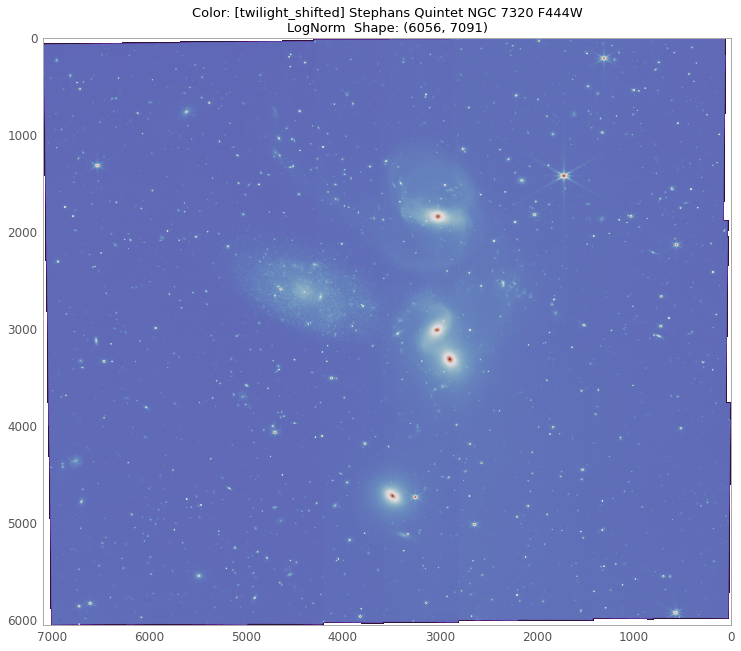


Done!


In [50]:
color_start = 11  # 14 colors
color_end   = 12
savefig = "N"

image = '/Volumes/HD_2021/JWST/NGC 7320 Stephans Quintet F444W/JWST/jw02732-o001_t001_nircam_clear-f444w/jw02732-o001_t001_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "Stephans Quintet NGC 7320 F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

# Reset to defaults
color_start = 0  # 14 colors
color_end   = 12
savefig = "N"

In [ ]:
"""image = '/Volumes/HD_2021/JWST/NGC7320 Stephans Quintet F1000W/JWST/jw02732-o002_t001_miri_f1000w/jw02732-o002_t001_miri_f1000w_' + str(suffix) + '.fits'
image_text = "Stephans Quintet NGC7320 F1000W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)""";

### NGC 3132 Southern Ring Nebula   

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3132 Southern Ring Nebula F090W/JWST/jw02733-o001_t001_nircam_clear-f090w/jw02733-o001_t001_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "NGC 3132 Southern Ring Nebula F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3132 Southern Ring Nebula F356W/JWST/jw02733-o001_t001_nircam_clear-f356w/jw02733-o001_t001_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "NGC 3132 Southern Ring Nebula F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3132 Southern Ring Nebula F444W/JWST/jw02733-o001_t001_nircam_f444w-f470n/jw02733-o001_t001_nircam_f444w-f470n_' + str(suffix) + '.fits'
image_text = "NGC 3132 Southern Ring Nebula F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### NGC 628 Galaxy [M74]  

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 628 M74 Galaxy F200W/JWST/jw02107-o040_t018_nircam_clear-f200w/jw02107-o040_t018_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "M74 Galaxy NGC 628 F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 628 M74 Galaxy F300M/JWST/jw02107-o040_t018_nircam_clear-f300m/jw02107-o040_t018_nircam_clear-f300m_' + str(suffix) + '.fits'
image_text = "M74 Galaxy NGC 628 F300M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 628 M74 Galaxy F335M/JWST/jw02107-o040_t018_nircam_clear-f335m/jw02107-o040_t018_nircam_clear-f335m_' + str(suffix) + '.fits'
image_text = "M74 Galaxy NGC 628 F335M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 628 M74 Galaxy F350M/JWST/jw02107-o040_t018_nircam_clear-f360m/jw02107-o040_t018_nircam_clear-f360m_' + str(suffix) + '.fits'
image_text = "M74 Galaxy NGC 628 F350M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### NGC 7469 Galaxy 

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 7469 Galaxy F150W/JWST/jw01328-o019_t010_nircam_clear-f150w/jw01328-o019_t010_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "NGC 7469 Galaxy F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 7469 Galaxy F200W/JWST/jw01328-o019_t010_nircam_clear-f200w/jw01328-o019_t010_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "NGC 7469 Galaxy F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 7469 Galaxy F444W/JWST/jw01328-o019_t010_nircam_clear-f444w/jw01328-o019_t010_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "NGC 7469 Galaxy F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### Cartwheel Galaxy 


In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F090W/JWST/jw02727-o002_t062_nircam_clear-f090w/jw02727-o002_t062_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "Cartwheel F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F150W/JWST/jw02727-o002_t062_nircam_clear-f150w/jw02727-o002_t062_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "Cartwheel F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F200W/JWST/jw02727-o002_t062_nircam_clear-f200w/jw02727-o002_t062_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "Cartwheel F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F277W/JWST/jw02727-o002_t062_nircam_clear-f277w/jw02727-o002_t062_nircam_clear-f277w_' + str(suffix) + '.fits'
image_text = "Cartwheel F277W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F356W/JWST/jw02727-o002_t062_nircam_clear-f356w/jw02727-o002_t062_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "Cartwheel F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F444W/JWST/jw02727-o002_t062_nircam_clear-f444w/jw02727-o002_t062_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "Cartwheel F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F770W/JWST/jw02727-o007_t062_miri_f770w/jw02727-o007_t062_miri_f770w_' + str(suffix) + '.fits'
image_text = "Cartwheel F770W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F1000W/JWST/jw02727-o007_t062_miri_f1000w/jw02727-o007_t062_miri_f1000w_' + str(suffix) + '.fits'
image_text = "Cartwheel F1000W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F1280W/JWST/jw02727-o007_t062_miri_f1280w/jw02727-o007_t062_miri_f1280w_' + str(suffix) + '.fits'
image_text = "Cartwheel F1280W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Cartwheel F1800W/JWST/jw02727-o007_t062_miri_f1800w/jw02727-o007_t062_miri_f1800w_' + str(suffix) + '.fits'
image_text = "Cartwheel F1800W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### SMAC J0723.3-7327 

In [ ]:
image = '/Volumes/HD_2021/JWST/SMAC J0723.3-7327 F090W/JWST/jw02736-o001_t001_nircam_clear-f090w/jw02736-o001_t001_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "SMAC J0723.3-7327 F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/SMAC J0723.3-7327 F150W/JWST/jw02736-o001_t001_nircam_clear-f150w/jw02736-o001_t001_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "SMAC J0723.3-7327 F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/SMAC J0723.3-7327 F200W/JWST/jw02736-o001_t001_nircam_clear-f200w/jw02736-o001_t001_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "SMAC J0723.3-7327 F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/SMAC J0723.3-7327 F277W/JWST/jw02736-o001_t001_nircam_clear-f277w/jw02736-o001_t001_nircam_clear-f277w_' + str(suffix) + '.fits'
image_text = "SMAC J0723.3-7327 F277W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/SMAC J0723.3-7327 F356W/JWST/jw02736-o001_t001_nircam_clear-f356w/jw02736-o001_t001_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "SMAC J0723.3-7327 F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/SMAC J0723.3-7327 F444W/JWST/jw02736-o001_t001_nircam_clear-f444w/jw02736-o001_t001_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "SMAC J0723.3-7327 F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### Jupiter 

In [ ]:
"""image = '/Volumes/HD_2021/JWST/Jupiter F150W/JWST/jw01022-o007_t001_nircam_clear-f150w/jw01022-o007_t001_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "Jupiter F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)""";

In [ ]:
"""image = '/Volumes/HD_2021/JWST/Jupiter F277W/JWST/jw01022-o008_t001_nircam_clear-f277w/jw01022-o008_t001_nircam_clear-f277w_' + str(suffix) + '.fits'
image_text = "Jupiter F277W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)""";

In [ ]:
image = '/Volumes/HD_2021/JWST/Jupiter F212N/JWST/jw01373-c1009_t006_nircam_clear-f212n/jw01373-c1009_t006_nircam_clear-f212n_' + str(suffix) + '.fits'
image_text = "Jupiter F212N"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
"""image = '/Volumes/HD_2021/JWST/Jupiter F250M/JWST/jw01373-o011_t030_nircam_clear-f250m-sub400p/jw01373-o011_t030_nircam_clear-f250m-sub400p_' + str(suffix) + '.fits'
image_text = "Jupiter F250M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)""";

In [ ]:
"""image = '/Volumes/HD_2021/JWST/Jupiter F356W/JWST/jw01022-o010_t001_nircam_clear-f356w/jw01022-o010_t001_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "Jupiter F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)""";

In [ ]:
image = '/Volumes/HD_2021/JWST/Jupiter F444W/JWST/jw01373-o007_t006_nircam_f405n-f444w-sub640/jw01373-o007_t006_nircam_f405n-f444w-sub640_' + str(suffix) + '.fits'
image_text = "Jupiter F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
"""image = '/Volumes/HD_2021/JWST/Jupiter F150W2/JWST/jw01373-o010_t006_nircam_clear-f150w2/jw01373-o010_t006_nircam_clear-f150w2_' + str(suffix) + '.fits'
image_text = "Jupiter F150W2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)""";

### NGC 2264 Cone Nebula

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 2264 Cone Nebula F200W/JWST/jw01410-o056_t050_nircam_clear-f200w/jw01410-o056_t050_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "NGC 2264 Cone Nebula F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 2264 Cone Nebula F250M/JWST/jw01410-o055_t050_nircam_clear-f250m/jw01410-o055_t050_nircam_clear-f250m_' + str(suffix) + '.fits'
image_text = "NGC 2264 Cone Nebula F250M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### Draco-II

In [ ]:
image = '/Volumes/HD_2021/JWST/Draco-II F090W/JWST/jw01334-o003_t003_nircam_clear-f090w/jw01334-o003_t003_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "Draco-II F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Draco-II F150W/JWST/jw01334-o003_t003_nircam_clear-f150w/jw01334-o003_t003_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "Draco-II F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Draco-II F480M/JWST/jw01334-o003_t003_nircam_clear-f480m/jw01334-o003_t003_nircam_clear-f480m_' + str(suffix) + '.fits'
image_text = "Draco-II F480M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Draco-II F360M/JWST/jw01334-o003_t003_nircam_clear-f360m/jw01334-o003_t003_nircam_clear-f360m_' + str(suffix) + '.fits'
image_text = "Draco-II F360M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### Galactic Center

In [ ]:
image = '/Volumes/HD_2021/JWST/Galactic Center F070W/JWST/jw01448-o001_t024_nircam_clear-f070w/jw01448-o001_t024_nircam_clear-f070w_' + str(suffix) + '.fits'
image_text = "Galactic Center F070W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Galactic Center F115W/JWST/jw01448-o001_t024_nircam_clear-f115w/jw01448-o001_t024_nircam_clear-f115w_' + str(suffix) + '.fits'
image_text = "Galactic Center F115W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Galactic Center F150W/JWST/jw01448-o001_t024_nircam_clear-f150w/jw01448-o001_t024_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "Galactic Center F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Galactic Center F200W/JWST/jw01448-o001_t024_nircam_clear-f200w/jw01448-o001_t024_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "Galactic Center F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Galactic Center F277W/JWST/jw01448-o001_t024_nircam_clear-f277w/jw01448-o001_t024_nircam_clear-f277w_' + str(suffix) + '.fits'
image_text = "Galactic Center F277W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Galactic Center F356W/JWST/jw01448-o001_t024_nircam_clear-f356w/jw01448-o001_t024_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "Galactic Center F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Galactic Center F444W/JWST/jw01448-o001_t024_nircam_clear-f444w/jw01448-o001_t024_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "Galactic Center F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Galactic Center F480M/JWST/jw01448-o001_t024_nircam_clear-f480m/jw01448-o001_t024_nircam_clear-f480m_' + str(suffix) + '.fits'
image_text = "Galactic Center F480M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### NGC 3324 Carina Nebula 

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3324 Carina Nebula F090W/JWST/jw02731-o001_t017_nircam_clear-f090w/jw02731-o001_t017_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "NGC 3324 Carina Nebula F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3324 Carina Nebula F200W/JWST/jw02731-o001_t017_nircam_clear-f200w/jw02731-o001_t017_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "NGC 3324 Carina Nebula F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3324 Carina Nebula F187N/JWST/jw02731-o001_t017_nircam_clear-f187n/jw02731-o001_t017_nircam_clear-f187n_' + str(suffix) + '.fits'
image_text = "NGC 3324 Carina Nebula F187N"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3324 Carina Nebula F335M/JWST/jw02731-o001_t017_nircam_clear-f335m/jw02731-o001_t017_nircam_clear-f335m_' + str(suffix) + '.fits'
image_text = "NGC 3324 Carina Nebula F335M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3324 Carina Nebula F444W/JWST/jw02731-o001_t017_nircam_clear-f444w/jw02731-o001_t017_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "NGC 3324 Carina Nebula F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 3324 Carina Nebula 2 F444W/JWST/jw02731-o001_t017_nircam_f444w-f470n/jw02731-o001_t017_nircam_f444w-f470n_' + str(suffix) + '.fits'
image_text = "NGC 3324 Carina Nebula F444W-F470N"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### LMC

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F070W/JWST/jw01476-o001_t001_nircam_clear-f070w/jw01476-o001_t001_nircam_clear-f070w_' + str(suffix) + '.fits'
image_text = "LMC F070W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F090W/JWST/jw01476-o001_t001_nircam_clear-f090w/jw01476-o001_t001_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "LMC F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F115W/JWST/jw01476-o001_t001_nircam_clear-f115w/jw01476-o001_t001_nircam_clear-f115w_' + str(suffix) + '.fits'
image_text = "LMC F115W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F150W/JWST/jw01476-o001_t001_nircam_clear-f150w/jw01476-o001_t001_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "LMC F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F200W/JWST/jw01476-o001_t001_nircam_clear-f200w/jw01476-o001_t001_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "LMC F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F277W/JWST/jw01476-o001_t001_nircam_clear-f277w/jw01476-o001_t001_nircam_clear-f277w_' + str(suffix) + '.fits'
image_text = "LMC F277W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F356W/JWST/jw01476-o001_t001_nircam_clear-f356w/jw01476-o001_t001_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "LMC F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F444W 1/JWST/jw01476-o001_t001_nircam_f444w-f466n/jw01476-o001_t001_nircam_f444w-f466n_' + str(suffix) + '.fits'
image_text = "LMC F444W_1"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F444W 2/JWST/jw01476-o001_t001_nircam_clear-f444w/jw01476-o001_t001_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "LMC F444W_2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F444W 3/JWST/jw01476-o001_t001_nircam_f444w-f470n/jw01476-o001_t001_nircam_f444w-f470n_' + str(suffix) + '.fits'
image_text = "LMC F444W_3"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/LMC F444W 4/JWST/jw01476-o001_t001_nircam_f405n-f444w/jw01476-o001_t001_nircam_f405n-f444w_' + str(suffix) + '.fits'
image_text = "LMC F444W_4"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### WLM

In [ ]:
image = '/Volumes/HD_2021/JWST/WLM F090W/JWST/jw01334-o005_t002_nircam_clear-f090w/jw01334-o005_t002_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "WLM F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/WLM F150W/JWST/jw01334-o005_t002_nircam_clear-f150w/jw01334-o005_t002_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "WLM F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/WLM F250M/JWST/jw01334-o005_t002_nircam_clear-f250m/jw01334-o005_t002_nircam_clear-f250m_' + str(suffix) + '.fits'
image_text = "WLM F250M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/WLM F430M/JWST/jw01334-o005_t002_nircam_clear-f430m/jw01334-o005_t002_nircam_clear-f430m_' + str(suffix) + '.fits'
image_text = "WLM F430M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### NGC 6543 Cat's Eye Nebula 

In [ ]:
"""image = '/Volumes/HD_2021/JWST/NGC 6543 Cats Eye Nebula F770W/JWST/jw01031-o005_t012_miri_f770w/jw01031-o005_t012_miri_f770w_' + str(suffix) + '.fits'
image_text = "NGC 6543 Cats Eye Nebula F770W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)""";

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 6543 Cats Eye Nebula F560W/JWST/jw01023-o014_t001_miri_f560w/jw01023-o014_t001_miri_f560w_' + str(suffix) + '.fits'
image_text = "NGC 6543 Cats Eye Nebula F560W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### Abell 2744 Pandora's Cluster

In [ ]:
image = '/Volumes/HD_2021/JWST/Abell 2744 Pandoras Cluster F090W/JWST/jw01324-o001_t001_nircam_clear-f090w/jw01324-o001_t001_nircam_clear-f090w_' + str(suffix) + '.fits'
image_text = "Abell 2744 Pandoras Cluster F090W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Abell 2744 Pandoras Cluster F115W/JWST/jw01324-o001_t001_nircam_clear-f115w/jw01324-o001_t001_nircam_clear-f115w_' + str(suffix) + '.fits'
image_text = "Abell 2744 Pandoras Cluster F115W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Abell 2744 Pandoras Cluster F150W/JWST/jw01324-o001_t001_nircam_clear-f150w/jw01324-o001_t001_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "Abell 2744 Pandoras Cluster F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Abell 2744 Pandoras Cluster F200W/JWST/jw01324-o001_t001_nircam_clear-f200w/jw01324-o001_t001_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "Abell 2744 Pandoras Cluster F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Abell 2744 Pandoras Cluster F277W/JWST/jw01324-o001_t001_nircam_clear-f277w/jw01324-o001_t001_nircam_clear-f277w_' + str(suffix) + '.fits'
image_text = "Abell 2744 Pandoras Cluster F277W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Abell 2744 Pandoras Cluster F356W/JWST/jw01324-o001_t001_nircam_clear-f356w/jw01324-o001_t001_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "Abell 2744 Pandoras Cluster F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Abell 2744 Pandoras Cluster F444W/JWST/jw01324-o001_t001_nircam_clear-f444w/jw01324-o001_t001_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "Abell 2744 Pandoras Cluster F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### VV114 - IC 1623 - High Infrared Lunimosity Interacting Galaxy System

In [ ]:
image = '/Volumes/HD_2021/JWST/VV114 IC 1623 F150W/JWST/jw01328-o024_t021_nircam_clear-f150w/jw01328-o024_t021_nircam_clear-f150w_' + str(suffix) + '.fits'
image_text = "VV114 IC 1623 F150W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/VV114 IC 1623 F200W/JWST/jw01328-o024_t021_nircam_clear-f200w/jw01328-o024_t021_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "VV114 IC 1623 F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/VV114 IC 1623 F356W/JWST/jw01328-o024_t021_nircam_clear-f356w/jw01328-o024_t021_nircam_clear-f356w_' + str(suffix) + '.fits'
image_text = "VV114 IC 1623 F356W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/VV114 IC 1623 F444W/JWST/jw01328-o024_t021_nircam_clear-f444w/jw01328-o024_t021_nircam_clear-f444w_' + str(suffix) + '.fits'
image_text = "VV114 IC 1623 F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### NGC 5139 Omega Centauri

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 5139 Omega Centauri F277W/JWST/jw01478-c1000_t003_nircam_clear-f277w/jw01478-c1000_t003_nircam_clear-f277w_' + str(suffix) + '.fits'
image_text = "NGC 5139 Omega Centauri F277W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 5139 Omega Centauri F444W/JWST/jw01478-o015_t003_nircam_f444w-f470n/jw01478-o015_t003_nircam_f444w-f470n_' + str(suffix) + '.fits'
image_text = "NGC 5139 Omega Centauri F444W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### NGC 1365 The Great Barred Spiral Galaxy

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 1365 The Great Barred Spiral Galaxy F200W/JWST/jw02107-c1003_t003_nircam_clear-f200w/jw02107-c1003_t003_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "NGC 1365 The Great Barred Spiral Galaxy F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 1365 The Great Barred Spiral Galaxy F200W 2/JWST/jw02107-o021_t003_nircam_clear-f200w/jw02107-o021_t003_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "NGC 1365 The Great Barred Spiral Galaxy F200W 2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 1365 The Great Barred Spiral Galaxy F300M/JWST/jw02107-c1003_t003_nircam_clear-f300m/jw02107-c1003_t003_nircam_clear-f300m_' + str(suffix) + '.fits'
image_text = "NGC 1365 The Great Barred Spiral Galaxy F300M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 1365 The Great Barred Spiral Galaxy F300M 2/JWST/jw02107-o021_t003_nircam_clear-f300m/jw02107-o021_t003_nircam_clear-f300m_' + str(suffix) + '.fits'
image_text = "NGC 1365 The Great Barred Spiral Galaxy F300M 2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 1365 The Great Barred Spiral Galaxy F335M/JWST/jw02107-c1003_t003_nircam_clear-f335m/jw02107-c1003_t003_nircam_clear-f335m_' + str(suffix) + '.fits'
image_text = "NGC 1365 The Great Barred Spiral Galaxy F335M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 1365 The Great Barred Spiral Galaxy F335M 2/JWST/jw02107-o021_t003_nircam_clear-f335m/jw02107-o021_t003_nircam_clear-f335m_' + str(suffix) + '.fits'
image_text = "NGC 1365 The Great Barred Spiral Galaxy F335M 2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 1365 The Great Barred Spiral Galaxy F360M/JWST/jw02107-c1003_t003_nircam_clear-f360m/jw02107-c1003_t003_nircam_clear-f360m_' + str(suffix) + '.fits'
image_text = "NGC 1365 The Great Barred Spiral Galaxy F360M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 1365 The Great Barred Spiral Galaxy F360M 2/JWST/jw02107-o021_t003_nircam_clear-f360m/jw02107-o021_t003_nircam_clear-f360m_' + str(suffix) + '.fits'
image_text = "NGC 1365 The Great Barred Spiral Galaxy F360M 2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### IC 5332 Galaxy

In [ ]:
image = '/Volumes/HD_2021/JWST/IC 5332 Galaxy F770W/JWST/jw02107-o018_t017_miri_f770w/jw02107-o018_t017_miri_f770w_' + str(suffix) + '.fits'
image_text = "IC 5332 Galaxy F770W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/IC 5332 Galaxy F1000W/JWST/jw02107-o018_t017_miri_f1000w/jw02107-o018_t017_miri_f1000w_' + str(suffix) + '.fits'
image_text = "IC 5332 Galaxy F1000W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/IC 5332 Galaxy F1130W/JWST/jw02107-o018_t017_miri_f1130w/jw02107-o018_t017_miri_f1130w_' + str(suffix) + '.fits'
image_text = "IC 5332 Galaxy F1130W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/IC 5332 Galaxy F2100W/JWST/jw02107-o018_t017_miri_f2100w/jw02107-o018_t017_miri_f2100w_' + str(suffix) + '.fits'
image_text = "IC 5332 Galaxy F2100W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### Baade Field

In [ ]:
image = '/Volumes/HD_2021/JWST/Baade Field F212N/JWST/jw01438-o001_t001_nircam_clear-f212n/jw01438-o001_t001_nircam_clear-f212n_' + str(suffix) + '.fits'
image_text = "Baade Field F212N"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Baade Field F212N 2/JWST/jw01438-o004_t001_nircam_clear-f212n/jw01438-o004_t001_nircam_clear-f212n_' + str(suffix) + '.fits'
image_text = "Baade Field F212N 2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Baade Field F212N 3/JWST/jw01438-a3001_t001_nircam_clear-f212n/jw01438-a3001_t001_nircam_clear-f212n_' + str(suffix) + '.fits'
image_text = "Baade Field F212N 3"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Baade Field F322W2/JWST/jw01438-o001_t001_nircam_f322w2-f323n/jw01438-o001_t001_nircam_f322w2-f323n_' + str(suffix) + '.fits'
image_text = "Baade Field F322W2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Baade Field F322W2 2/JWST/jw01438-a3001_t001_nircam_f322w2-f323n/jw01438-a3001_t001_nircam_f322w2-f323n_' + str(suffix) + '.fits'
image_text = "Baade Field F322W2 2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/Baade Field F322W2 3/JWST/jw01438-o004_t001_nircam_f322w2-f323n/jw01438-o004_t001_nircam_f322w2-f323n_' + str(suffix) + '.fits'
image_text = "Baade Field F322W2 3"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### NGC 6552 Barred Spiral Seyfert Galaxy

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 6552 Barred Spiral Galaxy F560W 1/JWST/jw01039-o002_t001_miri_f560w/jw01039-o002_t001_miri_f560w_' + str(suffix) + '.fits'
image_text = "NGC 6552 Barred Spiral Galaxy F560W 1"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 6552 Barred Spiral Galaxy F560W 2/JWST/jw01039-c1000_t001_miri_f560w/jw01039-c1000_t001_miri_f560w_' + str(suffix) + '.fits'
image_text = "NGC 6552 Barred Spiral Galaxy F560W 2"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 6552 Barred Spiral Galaxy F560W 3/JWST/jw01039-o003_t001_miri_f560w/jw01039-o003_t001_miri_f560w_' + str(suffix) + '.fits'
image_text = "NGC 6552 Barred Spiral Galaxy F560W 3"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 6552 Barred Spiral Galaxy F560W 4/JWST/jw01039-o004_t001_miri_f560w/jw01039-o004_t001_miri_f560w_' + str(suffix) + '.fits'
image_text = "NGC 6552 Barred Spiral Galaxy F560W 4"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 6552 Barred Spiral Galaxy F560W 5/JWST/jw01039-o005_t001_miri_f560w/jw01039-o005_t001_miri_f560w_' + str(suffix) + '.fits'
image_text = "NGC 6552 Barred Spiral Galaxy F560W 5"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

### NGC 7496 Spiral Galaxy in Grus


In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 7496 Galaxy F200W/JWST/jw02107-o041_t019_nircam_clear-f200w/jw02107-o041_t019_nircam_clear-f200w_' + str(suffix) + '.fits'
image_text = "NGC 7496 Galaxy F200W"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 7496 Galaxy F300M/JWST/jw02107-o041_t019_nircam_clear-f300m/jw02107-o041_t019_nircam_clear-f300m_' + str(suffix) + '.fits'
image_text = "NGC 7496 Galaxy F300M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 7496 Galaxy F335M/JWST/jw02107-o041_t019_nircam_clear-f335m/jw02107-o041_t019_nircam_clear-f335m_' + str(suffix) + '.fits'
image_text = "NGC 7496 Galaxy F335M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)

In [ ]:
image = '/Volumes/HD_2021/JWST/NGC 7496 Galaxy F360M/JWST/jw02107-o041_t019_nircam_clear-f360m/jw02107-o041_t019_nircam_clear-f360m_' + str(suffix) + '.fits'
image_text = "NGC 7496 Galaxy F360M"
ProcessTarget(suffix, image, image_text, dpi, savefig, color_start, color_end)